In [1]:
print("Rohan Mudrale")

Rohan Mudrale


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("UpdatedResumeDataSet.csv")

In [4]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
df.shape

(962, 2)

In [6]:
#Checking for no. of occurrences
df['Category'].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Blockchain,40
ETL Developer,40


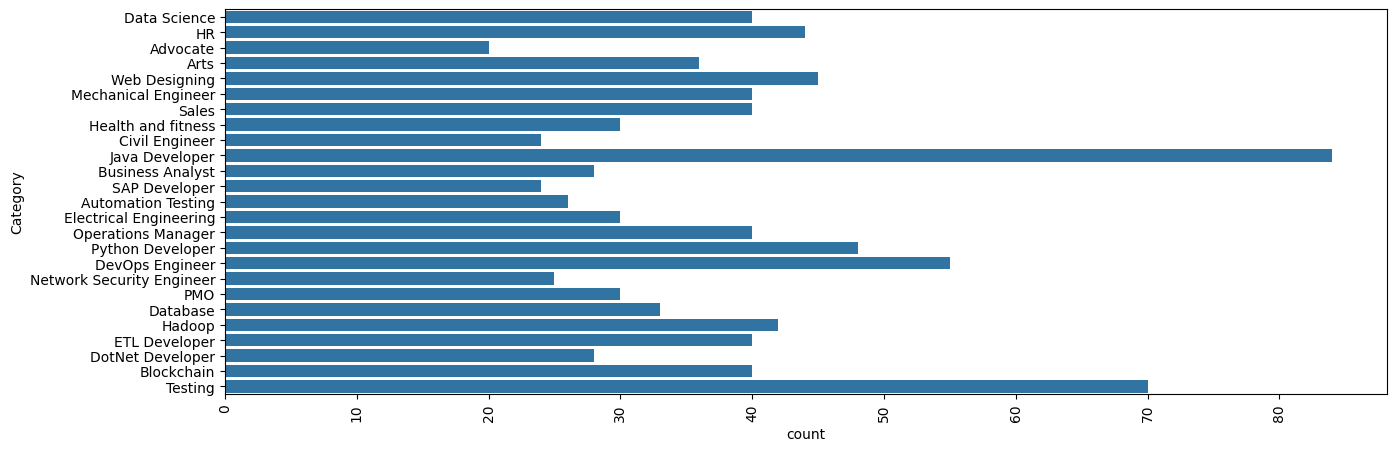

In [7]:
#Plotting the above the data in graph like structure to get a visual representation
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

In [8]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

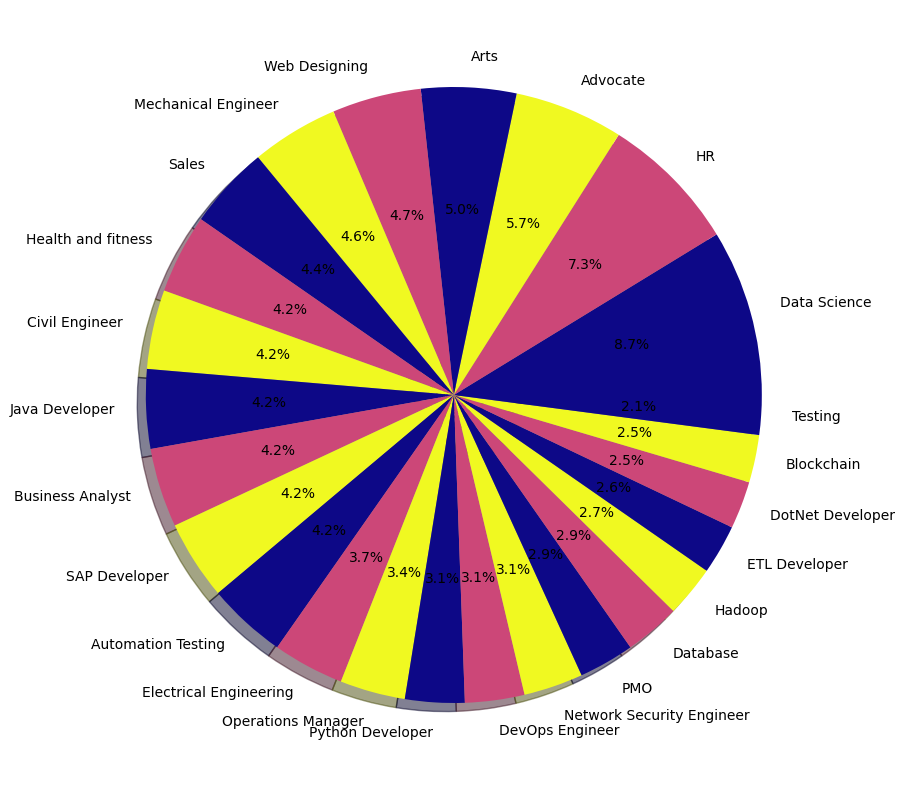

In [9]:
#Now we will be plotting a pie chart such that it will show us the percentage of each category
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()


In [10]:
# So now we will be exploring multiple resume
df['Category'][0]

'Data Science'

In [11]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [12]:
#Counting the entry in each category
print("Original Category Distribution:")
print(df['Category'].value_counts())

Original Category Distribution:
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64


In [13]:
#Now we will be writting code for getting the maximum size of category in our dataset
max_size = df['Category'].value_counts().max()

In [14]:
#Performing oversampling (basically we have to sample , replace=True if arguements allow sampling with replacement
balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)

<ipython-input-14-cba318383380>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)


In [15]:
#Dataset could be bias if placed in a specific order, therefore we will be shuffling it
df = balanced_df.sample(frac=1).reset_index(drop=True)

In [16]:
#Printing and checking now
print("\nBalanced Category Distribution (After Oversampling):")
print(df['Category'].value_counts())


Balanced Category Distribution (After Oversampling):
Category
Health and fitness           84
SAP Developer                84
Web Designing                84
HR                           84
DevOps Engineer              84
Database                     84
Operations Manager           84
Automation Testing           84
Data Science                 84
Civil Engineer               84
ETL Developer                84
Network Security Engineer    84
Hadoop                       84
Advocate                     84
Arts                         84
Electrical Engineering       84
Testing                      84
Business Analyst             84
PMO                          84
Java Developer               84
Python Developer             84
Blockchain                   84
Sales                        84
DotNet Developer             84
Mechanical Engineer          84
Name: count, dtype: int64


Now any given dataset will not always be clean, it may contain stuffs which are not useful and may cause difficulty while training our dataset. We will therefore celan the dataset.

In [17]:
#Cleaning the Data
#URLS, HASHTAGS, MENTIONS,SPECIAL CHARACTERS,PUNCTUATIONS
import re
def cleanResume(txt):
  cleanText = re.sub('http\S+\s',' ',txt)
  cleanText = re.sub('RT|cc',' ',cleanText)
  cleanText = re.sub('#\S+',' ',cleanText)
  cleanText = re.sub('@\S+',' ',cleanText)
  cleanText = re.sub('[%s]'%re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""),' ',cleanText)
  cleanText = re.sub(r'[^\x00-\x7f]',' ',cleanText)
  cleanText = re.sub('\s+',' ',cleanText)
  return cleanText

In [18]:
#Checking
cleanResume("I ***** $ # wish to buy Royal enfield %%%$$$$$ Classic 350")

'I wish to buy Royal enfield Classic 350'

In [19]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [20]:
df['Resume'][0]

'Education Details January 2018 M S Nutrition and Exercise Physiology New York NY Teachers College Columbia University January 2016 B S Nutrition and Dietetics Miami FL Florida International University January 2011 B Sc General Microbiology Pune Maharashtra Abasaheb Garware College Group Fitness Instructor India Group Fitness Instructor India Columbia University Skill Details Company Details company Columbia University description Present Organized high energy weight training cardiovascular and indoor cycling classes a ommodating participants of varying age groups cultural backgrounds and fitness levels to help achieve their fitness goals company Columbia Dental School description Provided detailed nutrition counselling and telephonic follow up to dental patients with a ompanying metabolic conditions like diabetes hypertension and obesity '

In [21]:
#We will be doing Label encoding as many machine learning and NLP models soes understand Texts.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [23]:
#We random values of int to it
df.Category.unique()

array([14,  0,  9, 22,  3, 20, 15, 19,  4, 23, 11,  1, 13, 21, 17, 10,  5,
        6,  2, 18,  7,  8, 12, 24, 16])

Vactorization

In [24]:
 from sklearn.feature_extraction.text import TfidfVectorizer
 tfidf = TfidfVectorizer(stop_words='english')

 tfidf.fit(df['Resume'])
 requredTaxt = tfidf.transform(df['Resume'])

Sampling

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(requredTaxt,df['Category'],test_size=0.2,random_state=42)

In [27]:
x_train.shape

(1680, 7231)

In [28]:
x_test.shape

(420, 7231)

Now training the model and printing the classification report

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
#Ensuring that x_train and x_test are dense if they are sparse
x_train = x_train.toarray() if hasattr(x_train, 'toarray') else x_train
x_test = x_test.toarray() if hasattr(x_test, 'toarray') else x_test

In [33]:
# 1. Train KNeighborsClassifier
knn_model = OneVsRestClassifier(KNeighborsClassifier())
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)
print("\nKNeighborsClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_knn)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_knn)}")


KNeighborsClassifier Results:
Accuracy: 0.9976
Confusion Matrix:
[[15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   1]
 [ 0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  

In [36]:
# 2. Train SVC
svc_model = OneVsRestClassifier(SVC())
svc_model.fit(x_train, y_train)
y_pred_svc = svc_model.predict(x_test)
print("\nSVC Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_svc)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_svc)}")


SVC Results:
Accuracy: 0.9976
Confusion Matrix:
[[15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   1]
 [ 0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0 

In [38]:
# 3. Train RandomForestClassifier
rf_model = OneVsRestClassifier(RandomForestClassifier())
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
print("\nRandomForestClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")


RandomForestClassifier Results:
Accuracy: 1.0000
Confusion Matrix:
[[15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0

In [39]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(svc_model, open('clf.pkl', 'wb'))
pickle.dump(le, open("encoder.pkl",'wb'))

In [40]:
# Function to predict the category of a resume
def pred(input_resume):
    # Preprocess the input text (e.g., cleaning, etc.)
    cleaned_text = cleanResume(input_resume)

    # Vectorize the cleaned text using the same TF-IDF vectorizer used during training
    vectorized_text = tfidf.transform([cleaned_text])

    # Convert sparse matrix to dense
    vectorized_text = vectorized_text.toarray()

    # Prediction
    predicted_category = svc_model.predict(vectorized_text)

    # get name of predicted category
    predicted_category_name = le.inverse_transform(predicted_category)

    return predicted_category_name[0]  # Return the category name


In [41]:
myresume = """
Jane Smith is a certified personal trainer with over 5 years of experience in helping individuals achieve their fitness goals. Specializing in weight loss, strength training, and sports conditioning, Jane has developed personalized workout routines for clients of all ages and fitness levels. She has extensive knowledge in nutrition and exercise science, and uses this to create holistic health and fitness programs that are tailored to individual needs.

Jane holds a degree in Exercise Science and is a certified trainer through the National Academy of Sports Medicine (NASM). She has worked with athletes, seniors, and individuals with chronic health conditions, helping them improve their physical well-being and overall quality of life.

Her expertise includes:
- Weight Loss and Body Composition
- Strength Training and Resistance Exercises
- Cardio Conditioning
- Nutrition Coaching and Meal Planning
- Injury Prevention and Rehabilitation
- Functional Movement and Flexibility Training
- Group Fitness Classes

Certifications:
- Certified Personal Trainer, NASM
- CPR and First Aid Certified
- Yoga Instructor (200-Hour Certification)

Education:
BSc in Exercise Science, ABC University, 2014-2018

Work Experience:
- Personal Trainer at XYZ Fitness Gym (2018-Present)
- Fitness Coach at Wellness Center (2016-2018)

Languages:
- English (Fluent)
- Spanish (Conversational)
"""

# Now, test the model with the Health and Fitness-focused resume
pred(myresume)


'Health and fitness'